<a href="https://colab.research.google.com/github/askmuhsin/AI-toolkit-MFS/blob/master/S6/run_experiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
%load_ext autoreload
%autoreload 2

In [20]:
! git clone https://github.com/eva7wandb/Eva7_Weights_Heist

Cloning into 'Eva7_Weights_Heist'...
remote: Enumerating objects: 207, done.
remote: Counting objects: 100% (207/207), done.
remote: Compressing objects: 100% (192/192), done.
remote: Total 207 (delta 76), reused 34 (delta 8), pack-reused 0
Receiving objects: 100% (207/207), 1.13 MiB | 2.56 MiB/s, done.
Resolving deltas: 100% (76/76), done.


In [21]:
! ls ./Eva7_Weights_Heist/S6

datasets  models  README.md  run_experiments.ipynb  usage_notebook.ipynb  utils


In [22]:
import sys
sys.path.append('./Eva7_Weights_Heist/S6/')

In [23]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from torchsummary import summary

from utils.general_utils import setup_env
from utils.training import train_model
from utils.testing import test_model
from utils.misclassified import (
    get_incorrect_preds, plot_incorrect_preds
)
from datasets.mnist import MNIST
from models.model import Net

In [4]:
cuda, device = setup_env()
print(cuda, device)

True cuda


In [5]:
## Load Dataset
train_dataloader, test_dataloader = MNIST(cuda).get_dataloader()

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid poten

In [6]:
logs = []

## MODEL 0
- Batch Norm Only

In [7]:
exp_name = 'batch norm only'
model = Net(
    batch_norm=True,
    dropout_value=0.01,
).to(device)
summary(model, input_size=(1, 28, 28))

optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
scheduler = StepLR(optimizer, step_size=8, gamma=0.01)

EPOCHS = 20
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train_batch_loss, train_batch_acc = train_model(
        model, device, train_dataloader, optimizer, epoch
    )
    test_loss, test_acc = test_model(model, device, test_dataloader)
    scheduler.step()
    
    logs.append({
        'epoch': epoch,
        'train_losses': np.mean(train_batch_loss),
        'test_losses': test_loss,
        'train_acc': np.mean(train_batch_acc),
        'test_acc': test_acc,
        'exp': exp_name,
    })

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 26, 26]              72
              ReLU-2            [-1, 8, 26, 26]               0
       BatchNorm2d-3            [-1, 8, 26, 26]              16
           Dropout-4            [-1, 8, 26, 26]               0
        conv_block-5            [-1, 8, 26, 26]               0
            Conv2d-6           [-1, 16, 24, 24]           1,152
              ReLU-7           [-1, 16, 24, 24]               0
       BatchNorm2d-8           [-1, 16, 24, 24]              32
           Dropout-9           [-1, 16, 24, 24]               0
       conv_block-10           [-1, 16, 24, 24]               0
           Conv2d-11            [-1, 8, 24, 24]             128
       conv_block-12            [-1, 8, 24, 24]               0
        MaxPool2d-13            [-1, 8, 12, 12]               0
           Conv2d-14           [-1, 12,

  0%|          | 0/938 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Loss=0.0423799492418766 Batch_id=937 Accuracy=94.62: 100%|██████████| 938/938 [00:27<00:00, 34.59it/s]



Test set: Average loss: 0.0557, Accuracy: 9813/10000 (98.13%)

EPOCH: 1


Loss=0.06958220899105072 Batch_id=937 Accuracy=97.99: 100%|██████████| 938/938 [00:27<00:00, 34.20it/s]



Test set: Average loss: 0.0524, Accuracy: 9834/10000 (98.34%)

EPOCH: 2


Loss=0.0790344849228859 Batch_id=937 Accuracy=98.28: 100%|██████████| 938/938 [00:27<00:00, 34.37it/s]



Test set: Average loss: 0.0422, Accuracy: 9867/10000 (98.67%)

EPOCH: 3


Loss=0.10575946420431137 Batch_id=937 Accuracy=98.50: 100%|██████████| 938/938 [00:27<00:00, 34.45it/s]



Test set: Average loss: 0.0466, Accuracy: 9852/10000 (98.52%)

EPOCH: 4


Loss=0.0016836015274748206 Batch_id=937 Accuracy=98.59: 100%|██████████| 938/938 [00:27<00:00, 34.65it/s]



Test set: Average loss: 0.0301, Accuracy: 9906/10000 (99.06%)

EPOCH: 5


Loss=0.002594918245449662 Batch_id=937 Accuracy=98.71: 100%|██████████| 938/938 [00:27<00:00, 34.64it/s]



Test set: Average loss: 0.0309, Accuracy: 9895/10000 (98.95%)

EPOCH: 6


Loss=0.08762416988611221 Batch_id=937 Accuracy=98.84: 100%|██████████| 938/938 [00:27<00:00, 34.64it/s]



Test set: Average loss: 0.0323, Accuracy: 9892/10000 (98.92%)

EPOCH: 7


Loss=0.0027451342903077602 Batch_id=937 Accuracy=98.84: 100%|██████████| 938/938 [00:26<00:00, 34.78it/s]



Test set: Average loss: 0.0306, Accuracy: 9890/10000 (98.90%)

EPOCH: 8


Loss=0.016721779480576515 Batch_id=937 Accuracy=99.07: 100%|██████████| 938/938 [00:27<00:00, 34.54it/s]



Test set: Average loss: 0.0253, Accuracy: 9911/10000 (99.11%)

EPOCH: 9


Loss=0.03330691158771515 Batch_id=937 Accuracy=99.18: 100%|██████████| 938/938 [00:27<00:00, 34.06it/s]



Test set: Average loss: 0.0246, Accuracy: 9914/10000 (99.14%)

EPOCH: 10


Loss=0.03202612325549126 Batch_id=937 Accuracy=99.24: 100%|██████████| 938/938 [00:27<00:00, 34.46it/s]



Test set: Average loss: 0.0232, Accuracy: 9922/10000 (99.22%)

EPOCH: 11


Loss=0.008692298084497452 Batch_id=937 Accuracy=99.23: 100%|██████████| 938/938 [00:26<00:00, 34.87it/s]



Test set: Average loss: 0.0227, Accuracy: 9928/10000 (99.28%)

EPOCH: 12


Loss=0.002768886974081397 Batch_id=937 Accuracy=99.27: 100%|██████████| 938/938 [00:27<00:00, 34.38it/s]



Test set: Average loss: 0.0228, Accuracy: 9923/10000 (99.23%)

EPOCH: 13


Loss=0.012906665913760662 Batch_id=937 Accuracy=99.22: 100%|██████████| 938/938 [00:27<00:00, 34.52it/s]



Test set: Average loss: 0.0216, Accuracy: 9929/10000 (99.29%)

EPOCH: 14


Loss=0.0008993464871309698 Batch_id=937 Accuracy=99.29: 100%|██████████| 938/938 [00:26<00:00, 34.94it/s]



Test set: Average loss: 0.0215, Accuracy: 9926/10000 (99.26%)

EPOCH: 15


Loss=0.10516291111707687 Batch_id=937 Accuracy=99.25: 100%|██████████| 938/938 [00:27<00:00, 34.08it/s]



Test set: Average loss: 0.0215, Accuracy: 9931/10000 (99.31%)

EPOCH: 16


Loss=0.023936802521348 Batch_id=937 Accuracy=99.27: 100%|██████████| 938/938 [00:27<00:00, 34.73it/s]



Test set: Average loss: 0.0217, Accuracy: 9929/10000 (99.29%)

EPOCH: 17


Loss=0.003997347317636013 Batch_id=937 Accuracy=99.28: 100%|██████████| 938/938 [00:27<00:00, 34.21it/s]



Test set: Average loss: 0.0211, Accuracy: 9934/10000 (99.34%)

EPOCH: 18


Loss=0.0036417364608496428 Batch_id=937 Accuracy=99.29: 100%|██████████| 938/938 [00:27<00:00, 34.36it/s]



Test set: Average loss: 0.0221, Accuracy: 9929/10000 (99.29%)

EPOCH: 19


Loss=0.025913890451192856 Batch_id=937 Accuracy=99.25: 100%|██████████| 938/938 [00:27<00:00, 34.55it/s]



Test set: Average loss: 0.0212, Accuracy: 9930/10000 (99.30%)



/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Classes in order Actual and Predicted


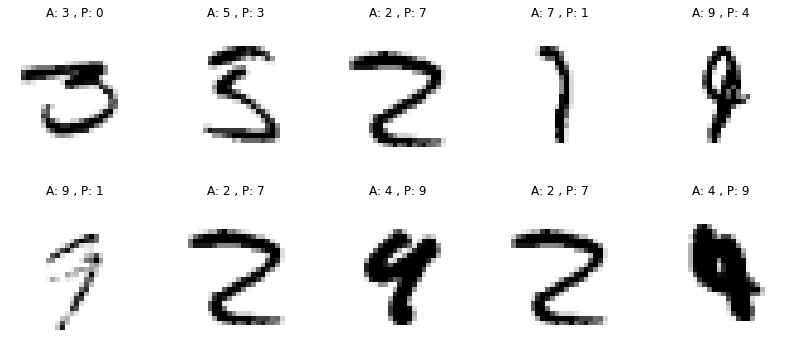

In [8]:
(
    true_wrong, incorrect_examples, pred_wrong
 ) = get_incorrect_preds(model, test_dataloader)
plot_incorrect_preds(true_wrong, incorrect_examples, pred_wrong)

In [9]:
del model, optimizer, scheduler

## MODEL 1
- Group Normalization Only

In [11]:
exp_name = 'Group norm only'
model = Net(
    batch_norm=False,
    layer_norm=False,
    group_norm=True,
    group_norm_groups=2,
).to(device)
summary(model, input_size=(1, 28, 28))

optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
scheduler = StepLR(optimizer, step_size=8, gamma=0.01)

EPOCHS = 20
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train_batch_loss, train_batch_acc = train_model(
        model, device, train_dataloader, optimizer, epoch
    )
    test_loss, test_acc = test_model(model, device, test_dataloader)
    scheduler.step()
    
    logs.append({
        'epoch': epoch,
        'train_losses': np.mean(train_batch_loss),
        'test_losses': test_loss,
        'train_acc': np.mean(train_batch_acc),
        'test_acc': test_acc,
        'exp': exp_name,
    })

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 26, 26]              72
              ReLU-2            [-1, 8, 26, 26]               0
         GroupNorm-3            [-1, 8, 26, 26]              16
           Dropout-4            [-1, 8, 26, 26]               0
        conv_block-5            [-1, 8, 26, 26]               0
            Conv2d-6           [-1, 16, 24, 24]           1,152
              ReLU-7           [-1, 16, 24, 24]               0
         GroupNorm-8           [-1, 16, 24, 24]              32
           Dropout-9           [-1, 16, 24, 24]               0
       conv_block-10           [-1, 16, 24, 24]               0
           Conv2d-11            [-1, 8, 24, 24]             128
       conv_block-12            [-1, 8, 24, 24]               0
        MaxPool2d-13            [-1, 8, 12, 12]               0
           Conv2d-14           [-1, 12,

  0%|          | 0/938 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Loss=0.0701524019241333 Batch_id=937 Accuracy=92.28: 100%|██████████| 938/938 [00:27<00:00, 33.98it/s]



Test set: Average loss: 0.0708, Accuracy: 9775/10000 (97.75%)

EPOCH: 1


Loss=0.08862143754959106 Batch_id=937 Accuracy=97.44: 100%|██████████| 938/938 [00:27<00:00, 34.26it/s]



Test set: Average loss: 0.0496, Accuracy: 9838/10000 (98.38%)

EPOCH: 2


Loss=0.19783926010131836 Batch_id=937 Accuracy=98.01: 100%|██████████| 938/938 [00:27<00:00, 34.48it/s]



Test set: Average loss: 0.0372, Accuracy: 9876/10000 (98.76%)

EPOCH: 3


Loss=0.10584836453199387 Batch_id=937 Accuracy=98.19: 100%|██████████| 938/938 [00:27<00:00, 34.52it/s]



Test set: Average loss: 0.0395, Accuracy: 9877/10000 (98.77%)

EPOCH: 4


Loss=0.03884228691458702 Batch_id=937 Accuracy=98.36: 100%|██████████| 938/938 [00:26<00:00, 34.78it/s]



Test set: Average loss: 0.0442, Accuracy: 9867/10000 (98.67%)

EPOCH: 5


Loss=0.0013131184969097376 Batch_id=937 Accuracy=98.53: 100%|██████████| 938/938 [00:27<00:00, 34.31it/s]



Test set: Average loss: 0.0329, Accuracy: 9905/10000 (99.05%)

EPOCH: 6


Loss=0.03944424167275429 Batch_id=937 Accuracy=98.59: 100%|██████████| 938/938 [00:27<00:00, 34.33it/s]



Test set: Average loss: 0.0344, Accuracy: 9893/10000 (98.93%)

EPOCH: 7


Loss=0.007532110437750816 Batch_id=937 Accuracy=98.72: 100%|██████████| 938/938 [00:27<00:00, 34.54it/s]



Test set: Average loss: 0.0339, Accuracy: 9888/10000 (98.88%)

EPOCH: 8


Loss=0.12802740931510925 Batch_id=937 Accuracy=98.97: 100%|██████████| 938/938 [00:27<00:00, 34.43it/s]



Test set: Average loss: 0.0247, Accuracy: 9920/10000 (99.20%)

EPOCH: 9


Loss=0.09718471020460129 Batch_id=937 Accuracy=99.09: 100%|██████████| 938/938 [00:27<00:00, 34.52it/s]



Test set: Average loss: 0.0242, Accuracy: 9924/10000 (99.24%)

EPOCH: 10


Loss=0.009035423398017883 Batch_id=937 Accuracy=99.16: 100%|██████████| 938/938 [00:27<00:00, 34.58it/s]



Test set: Average loss: 0.0234, Accuracy: 9926/10000 (99.26%)

EPOCH: 11


Loss=0.05135620757937431 Batch_id=937 Accuracy=99.15: 100%|██████████| 938/938 [00:27<00:00, 34.32it/s]



Test set: Average loss: 0.0232, Accuracy: 9925/10000 (99.25%)

EPOCH: 12


Loss=0.0009885422186926007 Batch_id=937 Accuracy=99.14: 100%|██████████| 938/938 [00:27<00:00, 34.03it/s]



Test set: Average loss: 0.0230, Accuracy: 9927/10000 (99.27%)

EPOCH: 13


Loss=0.0007600673707202077 Batch_id=937 Accuracy=99.16: 100%|██████████| 938/938 [00:27<00:00, 33.97it/s]



Test set: Average loss: 0.0228, Accuracy: 9927/10000 (99.27%)

EPOCH: 14


Loss=0.00445520831272006 Batch_id=937 Accuracy=99.14: 100%|██████████| 938/938 [00:27<00:00, 34.18it/s]



Test set: Average loss: 0.0226, Accuracy: 9929/10000 (99.29%)

EPOCH: 15


Loss=0.002104551997035742 Batch_id=937 Accuracy=99.17: 100%|██████████| 938/938 [00:27<00:00, 34.25it/s]



Test set: Average loss: 0.0224, Accuracy: 9928/10000 (99.28%)

EPOCH: 16


Loss=0.25545427203178406 Batch_id=937 Accuracy=99.20: 100%|██████████| 938/938 [00:27<00:00, 33.73it/s]



Test set: Average loss: 0.0224, Accuracy: 9928/10000 (99.28%)

EPOCH: 17


Loss=0.015224801376461983 Batch_id=937 Accuracy=99.22: 100%|██████████| 938/938 [00:27<00:00, 33.68it/s]



Test set: Average loss: 0.0224, Accuracy: 9928/10000 (99.28%)

EPOCH: 18


Loss=0.00927506573498249 Batch_id=937 Accuracy=99.21: 100%|██████████| 938/938 [00:27<00:00, 33.85it/s]



Test set: Average loss: 0.0224, Accuracy: 9928/10000 (99.28%)

EPOCH: 19


Loss=0.004569954704493284 Batch_id=937 Accuracy=99.21: 100%|██████████| 938/938 [00:27<00:00, 33.97it/s]



Test set: Average loss: 0.0224, Accuracy: 9928/10000 (99.28%)



/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Classes in order Actual and Predicted


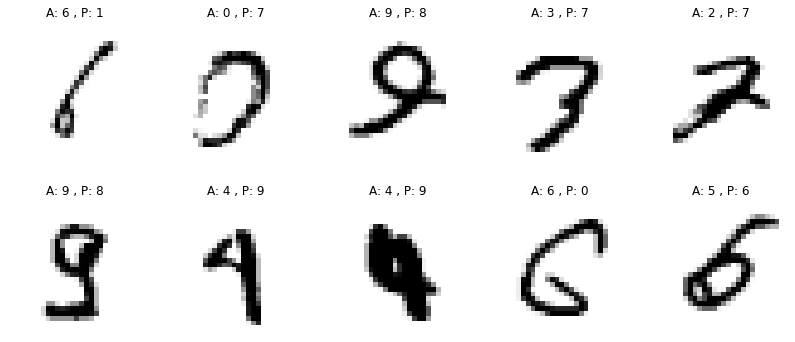

In [12]:
(
    true_wrong, incorrect_examples, pred_wrong
 ) = get_incorrect_preds(model, test_dataloader)
plot_incorrect_preds(true_wrong, incorrect_examples, pred_wrong)

In [13]:
del model, optimizer, scheduler

## MODEL 2
-  Layer Normalization Only

In [15]:
exp_name = 'Layer norm only'
model = Net(
    batch_norm=False,
    layer_norm=True,
    group_norm=False,
).to(device)
summary(model, input_size=(1, 28, 28))

optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
scheduler = StepLR(optimizer, step_size=8, gamma=0.01)

EPOCHS = 20
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train_batch_loss, train_batch_acc = train_model(
        model, device, train_dataloader, optimizer, epoch
    )
    test_loss, test_acc = test_model(model, device, test_dataloader)
    scheduler.step()
    
    logs.append({
        'epoch': epoch,
        'train_losses': np.mean(train_batch_loss),
        'test_losses': test_loss,
        'train_acc': np.mean(train_batch_acc),
        'test_acc': test_acc,
        'exp': exp_name,
    })

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 26, 26]              72
              ReLU-2            [-1, 8, 26, 26]               0
         GroupNorm-3            [-1, 8, 26, 26]              16
           Dropout-4            [-1, 8, 26, 26]               0
        conv_block-5            [-1, 8, 26, 26]               0
            Conv2d-6           [-1, 16, 24, 24]           1,152
              ReLU-7           [-1, 16, 24, 24]               0
         GroupNorm-8           [-1, 16, 24, 24]              32
           Dropout-9           [-1, 16, 24, 24]               0
       conv_block-10           [-1, 16, 24, 24]               0
           Conv2d-11            [-1, 8, 24, 24]             128
       conv_block-12            [-1, 8, 24, 24]               0
        MaxPool2d-13            [-1, 8, 12, 12]               0
           Conv2d-14           [-1, 12,

  0%|          | 0/938 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Loss=0.07048404216766357 Batch_id=937 Accuracy=91.19: 100%|██████████| 938/938 [00:27<00:00, 34.23it/s]



Test set: Average loss: 0.0705, Accuracy: 9783/10000 (97.83%)

EPOCH: 1


Loss=0.04831134155392647 Batch_id=937 Accuracy=97.42: 100%|██████████| 938/938 [00:27<00:00, 34.57it/s]



Test set: Average loss: 0.0859, Accuracy: 9731/10000 (97.31%)

EPOCH: 2


Loss=0.02141459658741951 Batch_id=937 Accuracy=98.02: 100%|██████████| 938/938 [00:27<00:00, 34.47it/s]



Test set: Average loss: 0.0394, Accuracy: 9881/10000 (98.81%)

EPOCH: 3


Loss=0.07072998583316803 Batch_id=937 Accuracy=98.24: 100%|██████████| 938/938 [00:27<00:00, 34.21it/s]



Test set: Average loss: 0.0350, Accuracy: 9884/10000 (98.84%)

EPOCH: 4


Loss=0.0027645775116980076 Batch_id=937 Accuracy=98.56: 100%|██████████| 938/938 [00:27<00:00, 34.47it/s]



Test set: Average loss: 0.0341, Accuracy: 9899/10000 (98.99%)

EPOCH: 5


Loss=0.0011899210512638092 Batch_id=937 Accuracy=98.67: 100%|██████████| 938/938 [00:27<00:00, 34.45it/s]



Test set: Average loss: 0.0277, Accuracy: 9905/10000 (99.05%)

EPOCH: 6


Loss=0.02008240669965744 Batch_id=937 Accuracy=98.66: 100%|██████████| 938/938 [00:27<00:00, 34.21it/s]



Test set: Average loss: 0.0366, Accuracy: 9895/10000 (98.95%)

EPOCH: 7


Loss=0.0013908876571804285 Batch_id=937 Accuracy=98.74: 100%|██████████| 938/938 [00:27<00:00, 34.03it/s]



Test set: Average loss: 0.0277, Accuracy: 9905/10000 (99.05%)

EPOCH: 8


Loss=0.0028887917287647724 Batch_id=937 Accuracy=99.05: 100%|██████████| 938/938 [00:27<00:00, 33.97it/s]



Test set: Average loss: 0.0225, Accuracy: 9935/10000 (99.35%)

EPOCH: 9


Loss=0.004657492507249117 Batch_id=937 Accuracy=99.18: 100%|██████████| 938/938 [00:27<00:00, 33.78it/s]



Test set: Average loss: 0.0212, Accuracy: 9944/10000 (99.44%)

EPOCH: 10


Loss=0.07144974917173386 Batch_id=937 Accuracy=99.19: 100%|██████████| 938/938 [00:27<00:00, 34.18it/s]



Test set: Average loss: 0.0206, Accuracy: 9942/10000 (99.42%)

EPOCH: 11


Loss=0.00016599571972619742 Batch_id=937 Accuracy=99.24: 100%|██████████| 938/938 [00:27<00:00, 33.97it/s]



Test set: Average loss: 0.0203, Accuracy: 9943/10000 (99.43%)

EPOCH: 12


Loss=0.0019847010262310505 Batch_id=937 Accuracy=99.25: 100%|██████████| 938/938 [00:27<00:00, 33.95it/s]



Test set: Average loss: 0.0199, Accuracy: 9944/10000 (99.44%)

EPOCH: 13


Loss=0.010017955675721169 Batch_id=937 Accuracy=99.23: 100%|██████████| 938/938 [00:27<00:00, 34.14it/s]



Test set: Average loss: 0.0198, Accuracy: 9945/10000 (99.45%)

EPOCH: 14


Loss=0.1528834104537964 Batch_id=937 Accuracy=99.24: 100%|██████████| 938/938 [00:27<00:00, 34.12it/s]



Test set: Average loss: 0.0196, Accuracy: 9946/10000 (99.46%)

EPOCH: 15


Loss=0.0002756383328232914 Batch_id=937 Accuracy=99.27: 100%|██████████| 938/938 [00:27<00:00, 33.80it/s]



Test set: Average loss: 0.0196, Accuracy: 9947/10000 (99.47%)

EPOCH: 16


Loss=0.01421409472823143 Batch_id=937 Accuracy=99.26: 100%|██████████| 938/938 [00:27<00:00, 34.20it/s]



Test set: Average loss: 0.0196, Accuracy: 9947/10000 (99.47%)

EPOCH: 17


Loss=0.03494194149971008 Batch_id=937 Accuracy=99.28: 100%|██████████| 938/938 [00:27<00:00, 33.73it/s]



Test set: Average loss: 0.0196, Accuracy: 9947/10000 (99.47%)

EPOCH: 18


Loss=0.020925749093294144 Batch_id=937 Accuracy=99.26: 100%|██████████| 938/938 [00:27<00:00, 33.74it/s]



Test set: Average loss: 0.0196, Accuracy: 9947/10000 (99.47%)

EPOCH: 19


Loss=0.008758488111197948 Batch_id=937 Accuracy=99.26: 100%|██████████| 938/938 [00:28<00:00, 33.33it/s]



Test set: Average loss: 0.0196, Accuracy: 9947/10000 (99.47%)



/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Classes in order Actual and Predicted


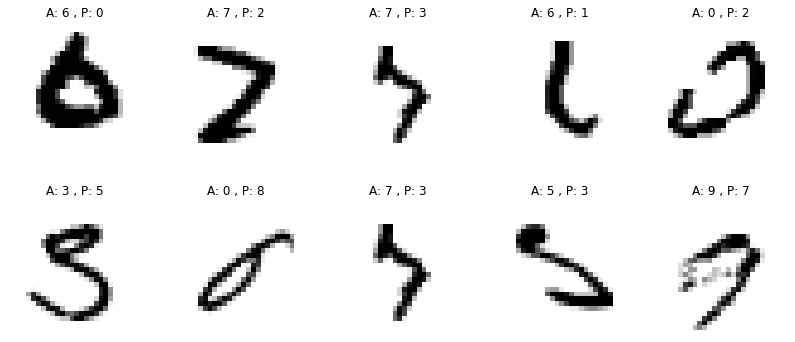

In [16]:
(
    true_wrong, incorrect_examples, pred_wrong
 ) = get_incorrect_preds(model, test_dataloader)
plot_incorrect_preds(true_wrong, incorrect_examples, pred_wrong)

In [17]:
del model, optimizer, scheduler

## MODEL 3
- Batch Normalization and L1

In [26]:
exp_name = 'Batch norm and L1'
model = Net(
    batch_norm=True,
    layer_norm=False,
    group_norm=False,
).to(device)
summary(model, input_size=(1, 28, 28))

optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
scheduler = StepLR(optimizer, step_size=8, gamma=0.01)

EPOCHS = 20
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train_batch_loss, train_batch_acc = train_model(
        model, device, train_dataloader, optimizer, epoch, L1=True,
    )
    test_loss, test_acc = test_model(model, device, test_dataloader)
    scheduler.step()
    
    logs.append({
        'epoch': epoch,
        'train_losses': np.mean(train_batch_loss),
        'test_losses': test_loss,
        'train_acc': np.mean(train_batch_acc),
        'test_acc': test_acc,
        'exp': exp_name,
    })

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 26, 26]              72
              ReLU-2            [-1, 8, 26, 26]               0
       BatchNorm2d-3            [-1, 8, 26, 26]              16
           Dropout-4            [-1, 8, 26, 26]               0
        conv_block-5            [-1, 8, 26, 26]               0
            Conv2d-6           [-1, 16, 24, 24]           1,152
              ReLU-7           [-1, 16, 24, 24]               0
       BatchNorm2d-8           [-1, 16, 24, 24]              32
           Dropout-9           [-1, 16, 24, 24]               0
       conv_block-10           [-1, 16, 24, 24]               0
           Conv2d-11            [-1, 8, 24, 24]             128
       conv_block-12            [-1, 8, 24, 24]               0
        MaxPool2d-13            [-1, 8, 12, 12]               0
           Conv2d-14           [-1, 12,

  0%|          | 0/938 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Loss=7.56199836730957 Batch_id=937 Accuracy=10.82: 100%|██████████| 938/938 [00:31<00:00, 30.05it/s]



Test set: Average loss: 2.3026, Accuracy: 1032/10000 (10.32%)

EPOCH: 1


Loss=7.631363868713379 Batch_id=937 Accuracy=10.17: 100%|██████████| 938/938 [00:30<00:00, 30.29it/s]



Test set: Average loss: 2.3026, Accuracy: 980/10000 (9.80%)

EPOCH: 2


Loss=7.593167304992676 Batch_id=937 Accuracy=9.92: 100%|██████████| 938/938 [00:31<00:00, 30.12it/s]



Test set: Average loss: 2.3026, Accuracy: 974/10000 (9.74%)

EPOCH: 3


Loss=7.582923889160156 Batch_id=937 Accuracy=10.20: 100%|██████████| 938/938 [00:31<00:00, 30.17it/s]



Test set: Average loss: 2.3026, Accuracy: 982/10000 (9.82%)

EPOCH: 4


Loss=7.5467400550842285 Batch_id=937 Accuracy=10.07: 100%|██████████| 938/938 [00:31<00:00, 30.07it/s]



Test set: Average loss: 2.3026, Accuracy: 1032/10000 (10.32%)

EPOCH: 5


Loss=7.618084907531738 Batch_id=937 Accuracy=9.87: 100%|██████████| 938/938 [00:31<00:00, 30.08it/s]



Test set: Average loss: 2.3026, Accuracy: 980/10000 (9.80%)

EPOCH: 6


Loss=7.564870834350586 Batch_id=937 Accuracy=9.91: 100%|██████████| 938/938 [00:31<00:00, 30.06it/s]



Test set: Average loss: 2.3026, Accuracy: 980/10000 (9.80%)

EPOCH: 7


Loss=7.517268657684326 Batch_id=937 Accuracy=10.11: 100%|██████████| 938/938 [00:31<00:00, 30.12it/s]



Test set: Average loss: 2.3026, Accuracy: 1009/10000 (10.09%)

EPOCH: 8


Loss=2.358560800552368 Batch_id=937 Accuracy=9.91: 100%|██████████| 938/938 [00:31<00:00, 30.00it/s]



Test set: Average loss: 2.3026, Accuracy: 980/10000 (9.80%)

EPOCH: 9


Loss=2.3599586486816406 Batch_id=937 Accuracy=9.87: 100%|██████████| 938/938 [00:31<00:00, 29.97it/s]



Test set: Average loss: 2.3026, Accuracy: 980/10000 (9.80%)

EPOCH: 10


Loss=2.3590192794799805 Batch_id=937 Accuracy=9.87: 100%|██████████| 938/938 [00:31<00:00, 30.19it/s]



Test set: Average loss: 2.3026, Accuracy: 980/10000 (9.80%)

EPOCH: 11


Loss=2.358628273010254 Batch_id=937 Accuracy=9.87: 100%|██████████| 938/938 [00:31<00:00, 30.22it/s]



Test set: Average loss: 2.3026, Accuracy: 980/10000 (9.80%)

EPOCH: 12


Loss=2.358738422393799 Batch_id=937 Accuracy=9.87: 100%|██████████| 938/938 [00:31<00:00, 30.24it/s]



Test set: Average loss: 2.3026, Accuracy: 980/10000 (9.80%)

EPOCH: 13


Loss=2.3582186698913574 Batch_id=937 Accuracy=9.87: 100%|██████████| 938/938 [00:30<00:00, 30.28it/s]



Test set: Average loss: 2.3026, Accuracy: 980/10000 (9.80%)

EPOCH: 14


Loss=2.357438802719116 Batch_id=937 Accuracy=9.87: 100%|██████████| 938/938 [00:30<00:00, 30.48it/s]



Test set: Average loss: 2.3026, Accuracy: 980/10000 (9.80%)

EPOCH: 15


Loss=2.3587405681610107 Batch_id=937 Accuracy=9.87: 100%|██████████| 938/938 [00:30<00:00, 30.28it/s]



Test set: Average loss: 2.3026, Accuracy: 980/10000 (9.80%)

EPOCH: 16


Loss=2.30314302444458 Batch_id=937 Accuracy=9.87: 100%|██████████| 938/938 [00:31<00:00, 30.19it/s]



Test set: Average loss: 2.3026, Accuracy: 980/10000 (9.80%)

EPOCH: 17


Loss=2.3031437397003174 Batch_id=937 Accuracy=9.87: 100%|██████████| 938/938 [00:31<00:00, 30.08it/s]



Test set: Average loss: 2.3026, Accuracy: 980/10000 (9.80%)

EPOCH: 18


Loss=2.3031489849090576 Batch_id=937 Accuracy=9.87: 100%|██████████| 938/938 [00:31<00:00, 30.17it/s]



Test set: Average loss: 2.3026, Accuracy: 980/10000 (9.80%)

EPOCH: 19


Loss=2.3031511306762695 Batch_id=937 Accuracy=9.87: 100%|██████████| 938/938 [00:31<00:00, 30.14it/s]



Test set: Average loss: 2.3026, Accuracy: 980/10000 (9.80%)



/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Classes in order Actual and Predicted


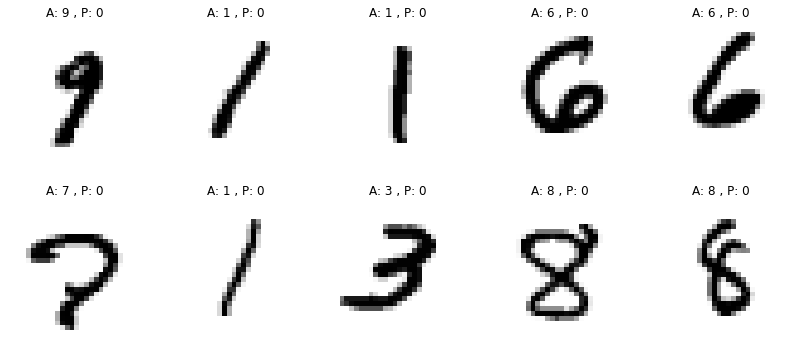

In [27]:
(
    true_wrong, incorrect_examples, pred_wrong
 ) = get_incorrect_preds(model, test_dataloader)
plot_incorrect_preds(true_wrong, incorrect_examples, pred_wrong)

In [28]:
del model, optimizer, scheduler

# Analysis

In [34]:
logs_df = pd.DataFrame(logs)
logs_df

,epoch,train_losses,test_losses,train_acc,test_acc,exp
0,0,0.177148,0.055651,88.690382,98.13,batch norm only
1,1,0.066136,0.052387,97.867371,98.34,batch norm only
2,2,0.055412,0.042169,98.210670,98.67,batch norm only
3,3,0.046372,0.046642,98.489079,98.52,batch norm only
4,4,0.045064,0.030142,98.502080,99.06,batch norm only
...,...,...,...,...,...,...
75,15,2.359181,2.302585,9.875280,9.80,Batch norm and L1
76,16,2.304362,2.302585,9.908250,9.80,Batch norm and L1
77,17,2.303147,2.302585,9.811335,9.80,Batch norm and L1
78,18,2.303147,2.302585,9.907271,9.80,Batch norm and L1


In [44]:
import seaborn as sns
sns.set(rc={'figure.figsize':(8, 6)})

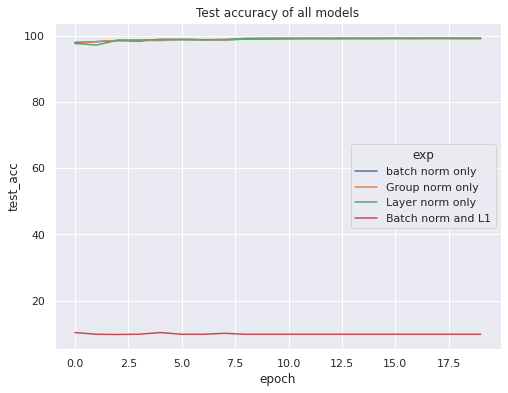

In [45]:
plt.title('Test accuracy of all models')
sns.lineplot(data=logs_df, x='epoch', y='test_acc', hue='exp')

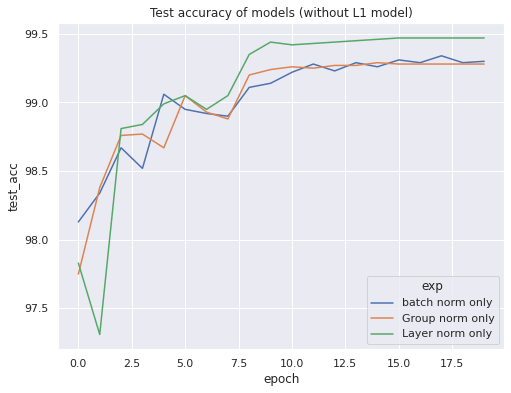

In [46]:
plt.title('Test accuracy of models (without L1 model)')
sns.lineplot(
    data=logs_df[logs_df.exp!='Batch norm and L1'], 
    x='epoch', y='test_acc', hue='exp'
)

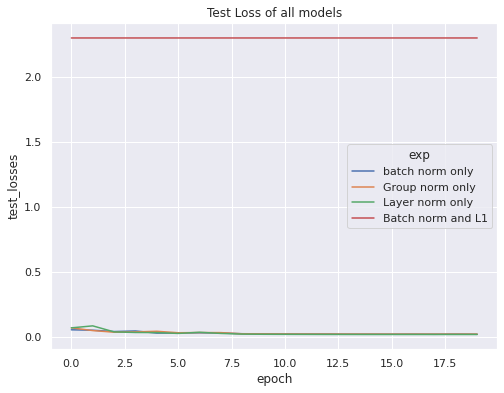

In [48]:
plt.title('Test Loss of all models')
sns.lineplot(data=logs_df, x='epoch', y='test_losses', hue='exp')

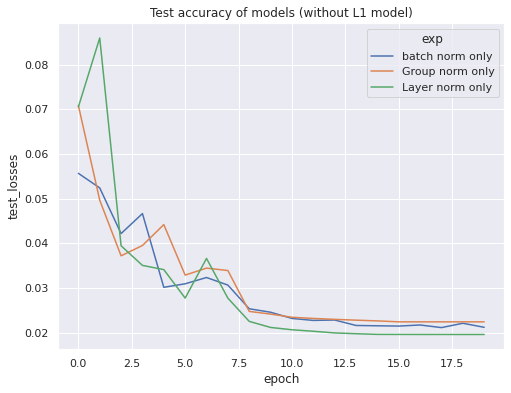

In [49]:
plt.title('Test accuracy of models (without L1 model)')
sns.lineplot(
    data=logs_df[logs_df.exp!='Batch norm and L1'], 
    x='epoch', y='test_losses', hue='exp'
)